# Data and Libraries import

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# DATASET_PATH = '/content/drive/My Drive/'

Mounted at /content/drive


In [ ]:
%pwd
%cd drive/MyDrive/BERT_NLP/

/content/drive/MyDrive/BERT_NLP


In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", problem_type="multi_label_classification")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
import pandas as pd


In [ ]:
# URL = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz", 
#                                   origin=URL,
#                                   untar=True,
#                                   cache_dir='.',
#                                   cache_subdir='')

# colnames=["LABEL_COLUMN",'tweet_id', 'DATA_COLUMN'] 
tweets_df = pd.read_csv('datasets/argument_dataset.csv', ',', header=0)
tweets_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Tweet,musawar_score,ali_score,average_score,argument_score
0,"It’s Super Bowl week, and Trump is using a pre...",3.0,5.0,4.0,1
1,Turns out Donald Trump was potentially exposed...,4.0,4.0,4.0,1
2,Had a totally surreal author moment at B&N tod...,3.0,5.0,4.0,1
3,"Forgive me, but I have to say this: imagine if...",3.0,4.0,3.5,1
4,The ban imposed on #kunalkamra by 4 airlines i...,4.0,3.0,3.5,1


In [ ]:
# colnames=['tweet_id', "sentiment", "DATA_COLUMN"] 
# test_df = pd.read_csv(DATASET_PATH+str('2points_test.tsv'), '\t', header=None, names=colnames)
# test_df.head()

In [ ]:
# tweets_df = tweets_df[(tweets_df.LABEL_COLUMN != "neutral")]


In [ ]:
cols = tweets_df[['Tweet', 'argument_score']]
data = cols.copy()

In [ ]:
data.head()

,Tweet,argument_score
0,"It’s Super Bowl week, and Trump is using a pre...",1
1,Turns out Donald Trump was potentially exposed...,1
2,Had a totally surreal author moment at B&N tod...,1
3,"Forgive me, but I have to say this: imagine if...",1
4,The ban imposed on #kunalkamra by 4 airlines i...,1


# Data (Pre) Processing

In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
stopwords = nlp.Defaults.stop_words

In [ ]:
doc = nlp("Its Super Bowl week, and Trump Hashtagsis using a prevent defense. The strategy sometimes backfires iN football. It may fail for Trump, too. ,")

# # n = [token.sents for token in doc]
# # n
for sent in doc.sents:
  print(sent.text)

Its Super Bowl week, and Trump Hashtagsis using a prevent defense.
The strategy sometimes backfires iN football.
It may fail for Trump, too. ,


In [ ]:
# @title Remove Links and Hashtags

import re
import string

def removeLinks(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def cleanAtTheRateAndHashtags(text):
    junk = ['\u2066','@', '#', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    words = text.split()
    res =[]
    for word in words:
      # print(word[0])
      if word[0] not in junk:
        res.append(word)
    return " ".join(res)

def deEmojify(text):
    "function to remove emojis from text"
    regrex_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return regrex_pattern.sub(r'',text)

def cleanseText(text):
    text = removeLinks(text)
    # print(text)
    txt = cleanAtTheRateAndHashtags(text)
    # re.sub(r'[^\x00-\x7F]+','', text)
    # print(txt)
    txt = deEmojify(txt)
    return txt.encode('ascii', 'ignore').decode('ascii')


# clean df
data['Tweet'] = data['Tweet'].apply(lambda tweet: cleanseText(tweet))

data.head()

,Tweet,argument_score,DATA_COLUMN
0,"It may fail for Trump, too. , The strategy som...",1,it may fail for trump too the strategy sometim...
1,"Maybe someone should let him know, so hell sta...",1,maybe someone should let he know so hell start...
2,For years and years and years Id walk into eve...,1,for year and year and year I would walk into e...
3,"We just take this cheap, embarrassing, egomani...",1,we just take this cheap embarrassing egomania ...
4,The ban imposed on by airlines is the act of a...,1,the ban impose on by airline be the act of a c...


In [ ]:
# @title Shuffle Sents
from sklearn.utils import shuffle
def shuffleSents(tweet):
  doc = nlp(tweet)
  sents = []
  for sent in doc.sents:
    sents.append(sent.text)
  # now shuffle the list
  # print(sents)
  sents=shuffle(sents)
  # print(sents)


  return ' '.join(sents)

# shuffleSents("Its Super Bowl week, and Trump is using a prevent defense. The strategy sometimes backfires iN football. It may fail for Trump, too. ,")
# 
data['Tweet'] = data['Tweet'].apply(lambda tweet: shuffleSents(tweet))
# tweets_df.drop(labels=['Tweet'], axis=1 , inplace=True)
data.head(10)

,Tweet,argument_score
0,"It may fail for Trump, too. , The strategy som...",1
1,"Maybe someone should let him know, so hell sta...",1
2,For years and years and years Id walk into eve...,1
3,"We just take this cheap, embarrassing, egomani...",1
4,The ban imposed on by airlines is the act of a...,1
5,", The old patient stayed in Wu Han hospital fo...",1
6,I want your opinion. Ok Star Trek friends.... ...,1
7,The child was suspected to be kidnapped and ki...,0
8,Ive got over pages of documents out of archive...,1
9,This is how little they care about people in t...,0


In [ ]:
# @title Process Text (Preprocess)

def process_text(text):
  doc = nlp(text)
  normalized_text = " ".join(token.norm_ for token in doc)
  doc = nlp(normalized_text)
  lemmed_text = " ".join(token.lemma_ for token in doc if not token.is_punct)
  # for token in doc:
  #   print(token , token.pos_)
  return lemmed_text

data['DATA_COLUMN'] = data['Tweet'].apply(lambda text: process_text(text))
data.head(20)

,Tweet,argument_score,DATA_COLUMN
0,"It may fail for Trump, too. , The strategy som...",1,it may fail for trump too the strategy sometim...
1,"Maybe someone should let him know, so hell sta...",1,maybe someone should let he know so hell start...
2,For years and years and years Id walk into eve...,1,for year and year and year I would walk into e...
3,"We just take this cheap, embarrassing, egomani...",1,we just take this cheap embarrassing egomania ...
4,The ban imposed on by airlines is the act of a...,1,the ban impose on by airline be the act of a c...
5,", The old patient stayed in Wu Han hospital fo...",1,the old patient stay in wu han hospital for ne...
6,I want your opinion. Ok Star Trek friends.... ...,1,I want your opinion ok star trek friend I be p...
7,The child was suspected to be kidnapped and ki...,0,the child be suspect to be kidnap and kill by ...
8,Ive got over pages of documents out of archive...,1,I have get over page of document out of archiv...
9,This is how little they care about people in t...,0,this be how little they care about people in t...


In [ ]:
process_text("Forgive me, but I have to say this: imagine if Barack Obama had referred to himself as America's Greatest President? What would conservatives - and the rest of us! - have said? We just take this cheap, embarrassing, egomania for granted. It\'s the norm")

In [ ]:
cols = data[['DATA_COLUMN', 'argument_score']]
tweets_data = cols.copy()
tweets_data.rename(columns={"argument_score": "LABEL_COLUMN"}, inplace=True)

In [ ]:
tweets_data.head()

,DATA_COLUMN,LABEL_COLUMN
0,it may fail for trump too the strategy sometim...,1
1,maybe someone should let he know so hell start...,1
2,for year and year and year I would walk into e...,1
3,we just take this cheap embarrassing egomania ...,1
4,the ban impose on by airline be the act of a c...,1


# Model ETC Stuff

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
tweets_data = shuffle(tweets_data)

In [ ]:
# train_full, test = train_test_split(tweets_data, test_size=0.3)
train, test = train_test_split(tweets_data, test_size=0.2)
# test = test_df_new
train.shape

(136, 2)

In [ ]:
train.LABEL_COLUMN.value_counts()

0    74
1    62
Name: LABEL_COLUMN, dtype: int64

In [ ]:
# @title Examples Prepare Funcs

InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

history = model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
10/10 [==============================] - 53s 2s/step - loss: 0.6862 - accuracy: 0.5404 - val_loss: 0.6594 - val_accuracy: 0.6571
Epoch 2/3
10/10 [==============================] - 15s 1s/step - loss: 0.5923 - accuracy: 0.7868 - val_loss: 0.6672 - val_accuracy: 0.6000
Epoch 3/3
10/10 [==============================] - 14s 1s/step - loss: 0.4056 - accuracy: 0.8934 - val_loss: 0.6797 - val_accuracy: 0.6571


In [ ]:
import matplotlib.pyplot as plt

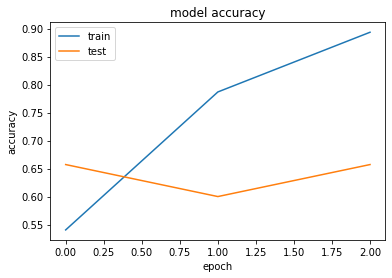

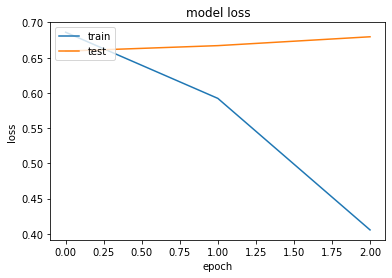

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
while True:
  pass

In [ ]:
tl = list(test_df_new.DATA_COLUMN)

In [ ]:
# t = tweets_new_df.DATA_COLUMN[0]


In [ ]:
preds_list

[["With whom you're in love with, according to your birthday month? Jan: shownu Feb: shownu Mar: shownu Apr: shownu May: shownu Jun: shownu Jul: shownu Aug: shownu Sep: shownu Oct: shownu Nov: shownu Dec: shownu",
  'Argument'],
 ['We visited the Five Hundred Acre Wood to see the great tree, one to climb it, three to watch. And of those who watched, one perhaps to dream of finding there a door with a knocker and a bell, and someone living behind it. Who? Who? Could it be owl?',
  'Argument'],
 ['Entropy is the measure of the disorder of a system.   Ex: A block of ice will increase entropy as it melts. As ice melts molecules break their original crystal lattice and spread further apart. The Universe is full of irreversible processes that continuously increase its entropy.',
  'Argument'],
 ['I am happy. Therefore, I would like to drink', 'Not an Argument']]

In [ ]:
test_df_new.LABEL_COLUMN.value_counts()

In [ ]:
preds_list[0:-1][1].count("Positive")

# Testing Now

In [ ]:
preds_list = []
test_data = [['Trump, signing the $8.3B coronavirus bill w/Azar standing over him, was asked why he canceled his trip to CDC.  Azar quickly interjected that Trump had sent him to CDC instead.  Trump then clarified that the trip was scuttled b/c CDC was concerned an official there had the virus.', 0],
             ['Garfield from @StrayCatsWM has had his leg amputation surgery today. He’s recovering well and we’re confident that he’ll manage just fine on three legs 💙🐱 #CatsOfTwitter https://t.co/0ujCkeDiyv', 1],
             ['Adrienne Posta is 71 today, Happy Birthday Adrienne 🎂🎉 https://t.co/NACZgxouV9', 0],
             ['So I feel really hot and sweaty and my heads thumping .... found this mosquito bite on my leg this morning ... 🦟😭 https://t.co/1qertDJYdY', 0],
             ["The Press Secretary says that what President Trump “cares about is taxpayer money” and making sure “there is no corruption tied to it.”  That doesn't add up. Trump has spent more than $100 million in taxpayer money to golf at courses he still owns and profits from.", 1],
             ['David Jason is 80 today, Happy Birthday David 🎂🎉 https://t.co/iPgaLz5rzp', 0],
             ['I know #Coronavirus is spreading outside of China, but total active cases are still falling.  Active cases are the only ones that can spread the virus.  Today 43,293 vs 44,314 yesterday.  The press keeps reporting total cases, and deaths, but not recoveries. https://t.co/hqYmqxV7ji', 1],
             ['Suicide is killing more people than Coronavirus. How about we all stock up on smiling at strangers instead?', 1],
             ['There are about 10,000 doctor vacancies and 43,000 nurse vacancies in the NHS.  This is not a problem that will be solved in the short term. The Government have left the population exposed to unnecessary risk. They have no one to blame but themselves.  https://t.co/VTyCaEMp3T', 1],
             ['NBA team doctors and trainers will have a conference call on Monday morning to discuss next steps with coronavirus, league sources tell ESPN.', 0],
             ['Not just anyone can pull off these bad boys, but I kinda feel  I can 😉 https://t.co/CsnBZxyPbj', 0],
             ['America’s Greatest President is trending.  Glad people are remembering and honoring President Obama.', 0],
             ['Fearful their tax cuts are in jeopardy, wealthy Koch donors plan to spend big to hold GOP Senate Majority in 2020 --  https://t.co/9bniHAjL34', 1],
             ['The reaction to the Joe Rogan endorsement is a perfect encapsulation of why progressives will probably lose this election.', 1],
             ['The nonchalance with which people Are like “corona only kills old people”makes me realize how much some of you truly hate your parents.',0],
             ['Corona virus is basically the flu. Is every flu season a pandemic?  There are literally millions and millions of active flu cases world wide right now.  It’s flu season for God sake. Isn’t the reaction just a little over the top?', 1],
             ["Birthday girl🥰❤️  @jeorella__ https://t.co/qtldCSJPfr", 0],
             ["Trump thinks COVID-19 is causing the stock market to drop.  It’s not.   What’s causing it to drop is that there’s a difficult situation (the virus) that needs to be dealt with and the person in charge has the impulse control of a 5-year-old.", 1],
             ["this is the BEST set of info I’ve found on corona virus and it’s worth watching the full 10mins https://t.co/oTNt5Cxg8j", 0],
             ['So Dr. Fauci not only admits honestly that we are failing on testing, but doing worse than other countries.  Ugh. Not the behavior usually associated with a "superpower." https://t.co/sVbeLXblLF', 1],
             ["Coronavirus? Who’s afraid? https://t.co/nNIxVwwGLB", 0],
             ["Sen. Dianne Feinstein Leans Toward Voting for Trump Acquittal https://t.co/Ty2KAbO16s", 0],
             ["Proud to be Somali. Proud to be African. Proud to be British. https://t.co/VY41Kz9y4j", 0],
             ["Get ready for even more surprise reveals, steamy romances, and heartwarming moments from #YR, because we've got big news! 🎉 The Young and the Restless has been renewed through 2024. Find out more here: https://t.co/Wo3BXnlXg2 https://t.co/TdWKhy1itI", 1],
             ]
pred_sentences = [process_text(cleanseText(text)) for text,arg in test_data]
# pred_sentences

In [ ]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Not an Argument', 'Argument']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  test_data[i].append(label[i])

In [ ]:
df = pd.DataFrame(test_data)

df.columns = ['Tweet', 'True Label', 'Predicted Label']
df.head()